Importing the necessary lib. (Install the package using HyperSpy...Other installations show a runtime error)
USING Python(conda env:base) Kernel

In [1]:
%matplotlib widget
import atomap.api as am

## Using a dataset emulating a zincblende heterostructure (from Atomap doc.)

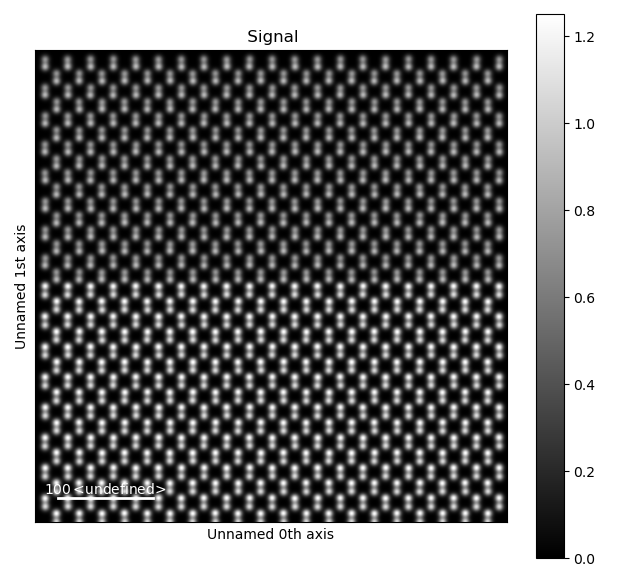

In [2]:
s = am.dummy_data.get_dumbbell_heterostructure_signal()
s.plot()

### Dumbbell vector
finding the “dumbbell vector”, which is the distance and direction between the atoms in the dumbbells. We do this by getting all the atomic positions, firstly by finding an appropriate feature separation. As the atoms in the dumbbells are typically pretty close together, we use a low "separation_range" between 2 and 6.

In [3]:
s_peaks = am.get_feature_separation(s, separation_range=(2, 6), show_progressbar=False)
s_peaks.plot()

 "get_atom_positions()" to get an array with all of these atomic positions

In [28]:
atom_positions = am.get_atom_positions(s, separation=2)
print (atom_positions)

[[142 490]
 [178 442]
 [454 426]
 ...
 [ 94  25]
 [382 205]
 [130  40]]


To find the dumbbell vector, these atom positions are passed to the "find_dumbbell_vector() function"

In [29]:
import atomap.initial_position_finding as ipf
dumbbell_vector = ipf.find_dumbbell_vector(atom_positions)
print (dumbbell_vector)

(0.0, -8.017295597484242)


### Making dumbbell lattice
by finding one atom in each of the dumbbells. As these are further apart, we use a higher "separation_range" between 5 and 20.
<br>The "dumbbell_vector" and "dumbbell_positions" are then used to make a dumbbell_lattice, with the "make_atom_lattice_dumbbell_structure()" function.
<br>Due to the atom columns being too close together, we can’t use the standard refine methods, but rather have to use a special one which fits both atoms in the dumbbell at the same time: "atomap.atom_lattice.Dumbbell_Lattice.refine_position_gaussian()"


In [6]:
s_peaks = am.get_feature_separation(s, separation_range=(5, 20), show_progressbar=False)
s_peaks.plot()

In [7]:
>>> dumbbell_positions = am.get_atom_positions(s, separation=8)


In [8]:
print (dumbbell_positions)

[[178 474]
 [442 250]
 [202 378]
 ...
 [190 153]
 [466 198]
 [358 153]]


Finding dumbbells:   0%|          | 0/656 [00:00<?, ?it/s]

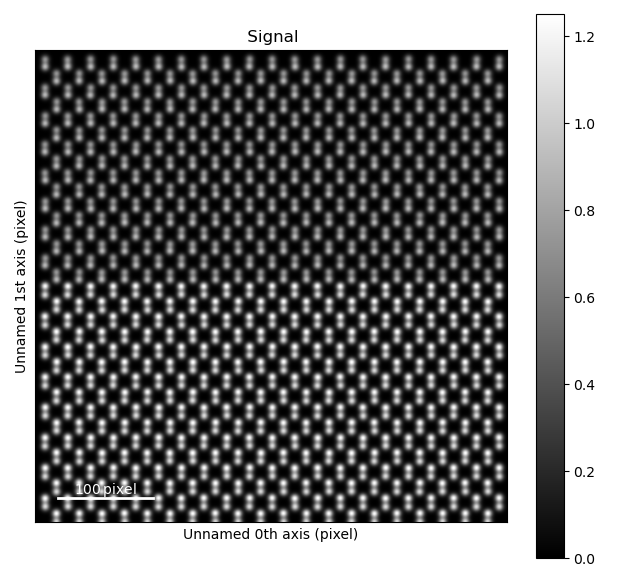

In [9]:
dumbbell_lattice = ipf.make_atom_lattice_dumbbell_structure(s, dumbbell_positions, dumbbell_vector)
dumbbell_lattice.plot()

In [10]:
dumbbell_lattice.refine_position_gaussian()

Gaussian fitting:   0%|          | 0/656 [00:00<?, ?it/s]

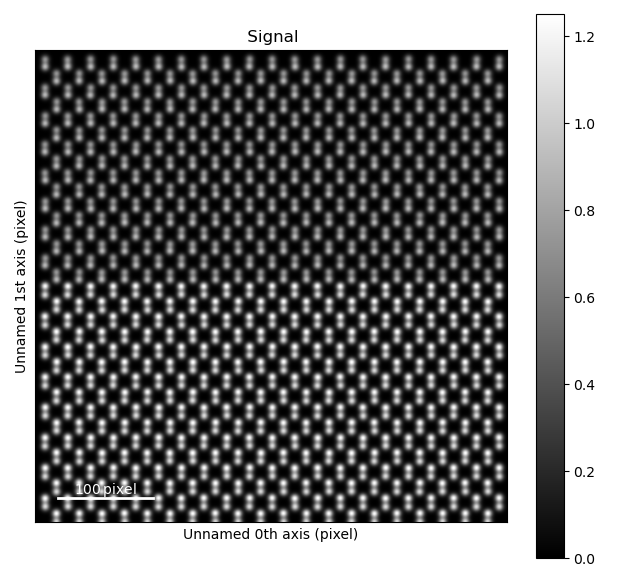

In [11]:
dumbbell_lattice.plot()

### Analusing the image 

coloum intensity<br>
out of plane lattice plane distance


Calculating Voronoi:   0%|          | 0/250000 [00:00<?, ?it/s]

Integrating:   0%|          | 0/1312 [00:00<?, ?it/s]

Building intensity map:   0%|          | 0/250000 [00:00<?, ?it/s]

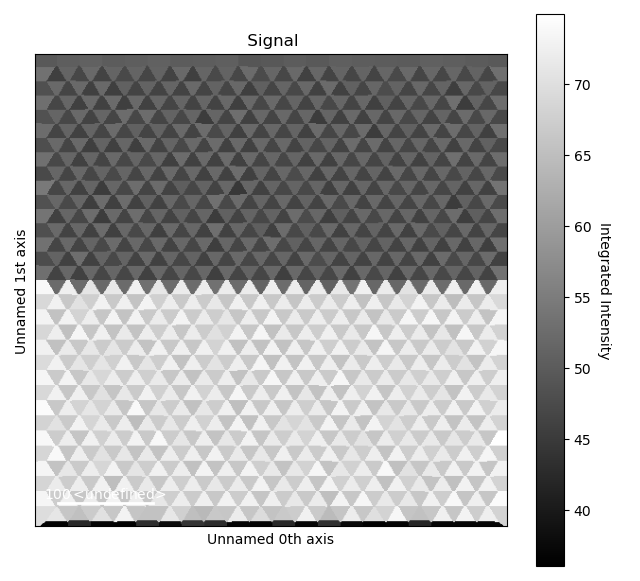

In [30]:
i_points, i_record, p_record = dumbbell_lattice.integrate_column_intensity()
i_record.plot()

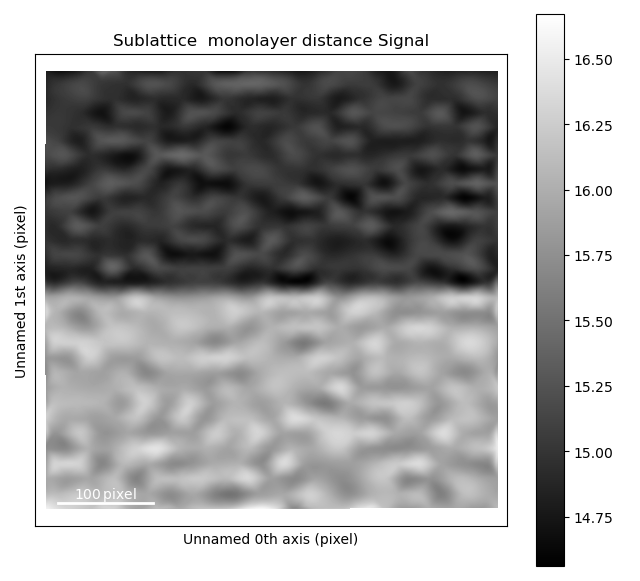

In [13]:
sublattice0 = dumbbell_lattice.sublattice_list[0]
sublattice0.construct_zone_axes()
out_of_plane_direction = sublattice0.zones_axis_average_distances[2]
interface_plane = sublattice0.atom_planes_by_zone_vector[out_of_plane_direction][15]
s_out_of_plane_map = sublattice0.get_monolayer_distance_map([out_of_plane_direction, ], atom_plane_list=[interface_plane])
s_out_of_plane_map.plot()

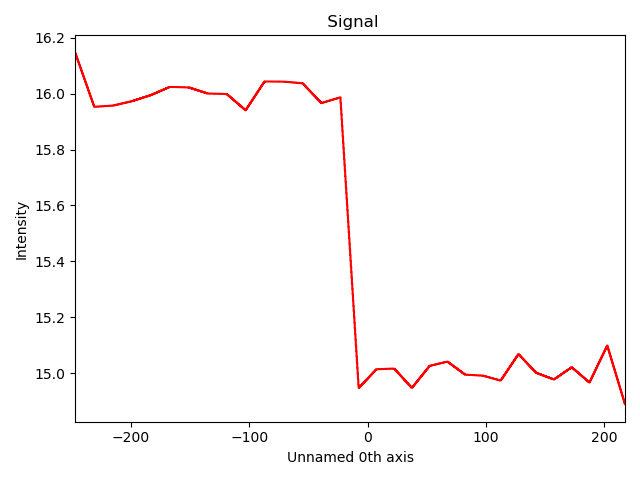

In [14]:
s_out_of_plane_line_profile = sublattice0.get_monolayer_distance_line_profile(out_of_plane_direction, atom_plane=interface_plane)
s_out_of_plane_line_profile.plot()

There are also some specific for the Dumbbell_Lattice object:

dumbbell_x, the x-position of the dumbbell, which is defined as the mean x-position of the two atoms in the dumbbell

dumbbell_y, the y-position of the dumbbell, which is defined as the mean y-position of the two atoms in the dumbbell

dumbbell_distance, distance between the atoms in each dumbbell

dumbbell_angle, angle between the atoms in each dumbbell, in relation to the horizontal axis

get_dumbbell_intensity_difference, intensity difference between the two atoms in the dumbbell

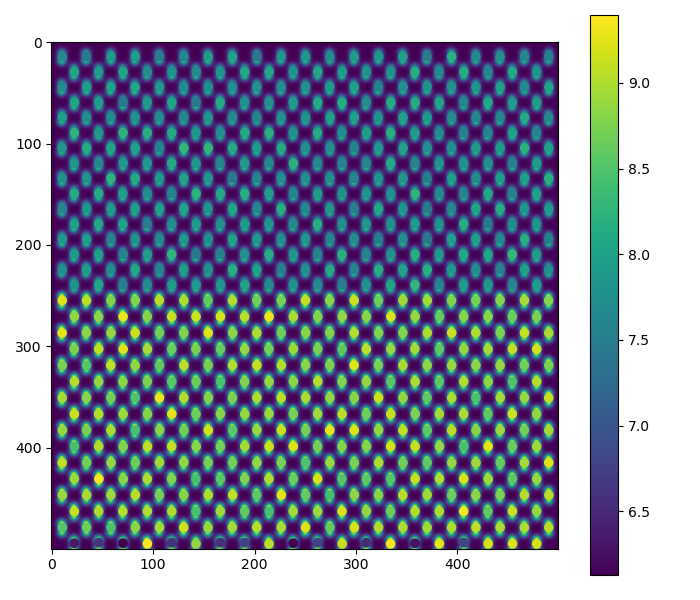

In [15]:
fig = dumbbell_lattice.plot_dumbbell_distance()


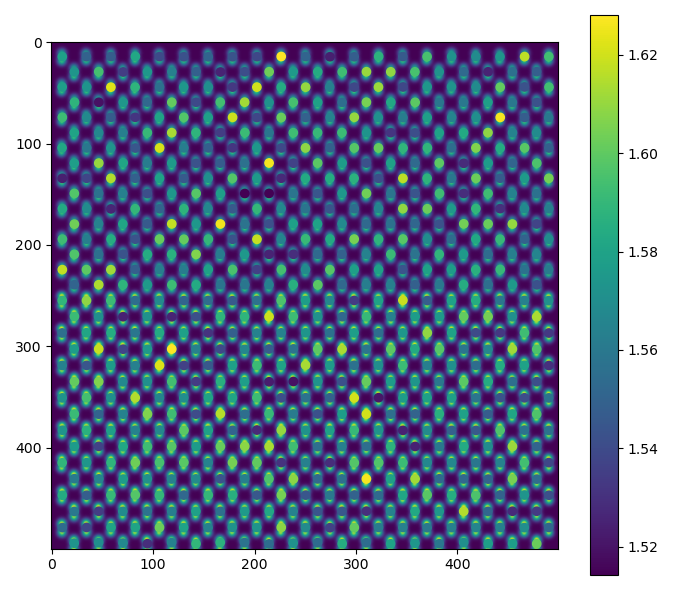

In [16]:
fig = dumbbell_lattice.plot_dumbbell_angle()

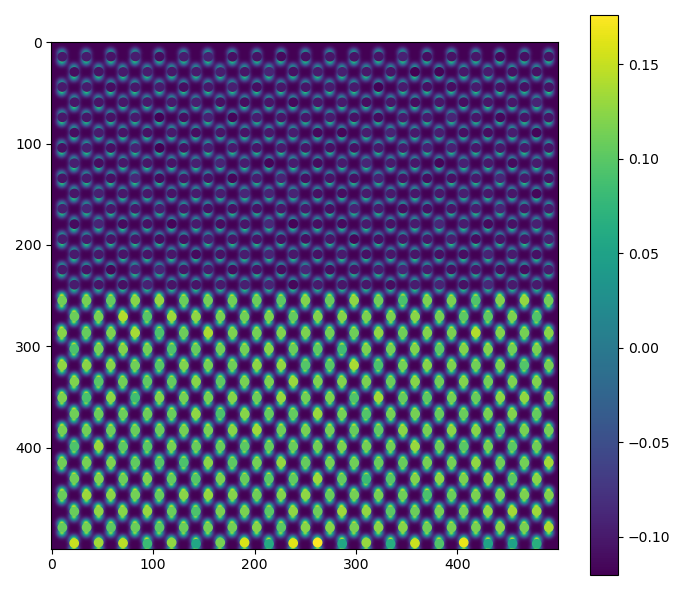

In [17]:
fig = dumbbell_lattice.plot_dumbbell_intensity_difference()

In [18]:
import atomap.api as am
atom_lattice = am.load_atom_lattice_from_hdf5("fantasite.hdf5")
atom_lattice

<Atom_Lattice, fantasite (sublattice(s): 2)>

Center of mass:   0%|          | 0/584 [00:00<?, ?it/s]

Gaussian fitting:   0%|          | 0/584 [00:00<?, ?it/s]

Subtracting atoms:   0%|          | 0/584 [00:00<?, ?it/s]

Image data has negative values, with the lowest being -0.2895475485206883. This is not supported, and can lead to bad fitting results. To fix the negative values, by increasing all pixel values by -0.2895475485206883, use the fix_negative_values=True parameter


Center of mass:   0%|          | 0/532 [00:00<?, ?it/s]

Gaussian fitting:   0%|          | 0/532 [00:00<?, ?it/s]

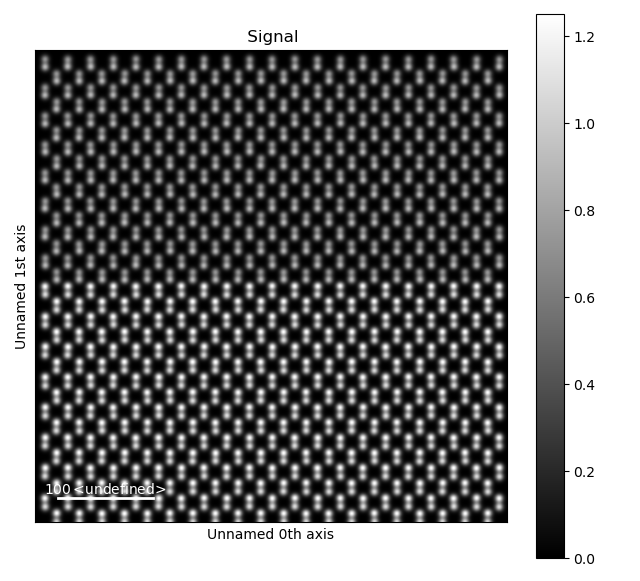

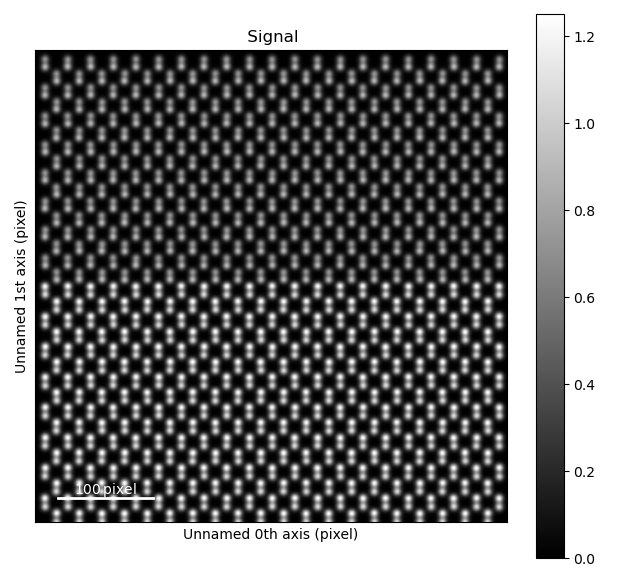

In [19]:
from atomap.tools import remove_atoms_from_image_using_2d_gaussian
s = am.dummy_data.get_dumbbell_heterostructure_signal()
A_positions = am.get_atom_positions(s, separation=12, pca=True)
sublattice_A = am.Sublattice(A_positions, image=s.data, color='r', name='A')
sublattice_A.find_nearest_neighbors()
sublattice_A.refine_atom_positions_using_center_of_mass()
sublattice_A.refine_atom_positions_using_2d_gaussian()
sublattice_A.construct_zone_axes()

direction_001 = sublattice_A.zones_axis_average_distances[1]
B_positions = sublattice_A.find_missing_atoms_from_zone_vector(direction_001)
image_without_A = remove_atoms_from_image_using_2d_gaussian(sublattice_A.image, sublattice_A)

sublattice_B = am.Sublattice(B_positions, image_without_A, color='blue', name='B')
sublattice_B.construct_zone_axes()
sublattice_B.refine_atom_positions_using_center_of_mass()
sublattice_B.refine_atom_positions_using_2d_gaussian()
atom_lattice = am.Atom_Lattice(image=s.data, name='dumbbell', sublattice_list=[sublattice_A, sublattice_B])
atom_lattice.save("dumbbell1.hdf5", overwrite=True)
s.plot()
atom_lattice.plot()

In [20]:
import atomap.api as am
atom_lattice = am.load_atom_lattice_from_hdf5("dumbbell1.hdf5")
atom_lattice

Image data has negative values, with the lowest being -0.2895475485206883. This is not supported, and can lead to bad fitting results. To fix the negative values, by increasing all pixel values by -0.2895475485206883, use the fix_negative_values=True parameter


<Atom_Lattice, dumbbell (sublattice(s): 2)>

In [21]:
atom_lattice.sublattice_list 

[<Sublattice, A (atoms:584,planes:6)>, <Sublattice, B (atoms:532,planes:6)>]

In [22]:
sublattice_A = atom_lattice.sublattice_list[0]
x = sublattice_A.x_position
y = sublattice_A.y_position
sigma_x = sublattice_A.sigma_x
sigmal_y = sublattice_A.sigma_y
ellipticity = sublattice_A.ellipticity
rotation = sublattice_A.rotation_ellipticity

In [23]:
atom_position_list = sublattice_A.atom_list
atom_position = atom_position_list[0]
x = atom_position.pixel_x
y = atom_position.pixel_y
sigma_x = atom_position.sigma_x
sigma_y = atom_position.sigma_y

In [24]:
atom_plane_list = sublattice_A.atom_plane_list
atom_plane = atom_plane_list[0]
atoms_in_plane_list = atom_plane.atom_list

In [25]:
zone_axis0 = sublattice_A.zones_axis_average_distances[0]
atom_plane_list0 = sublattice_A.atom_planes_by_zone_vector[zone_axis0]

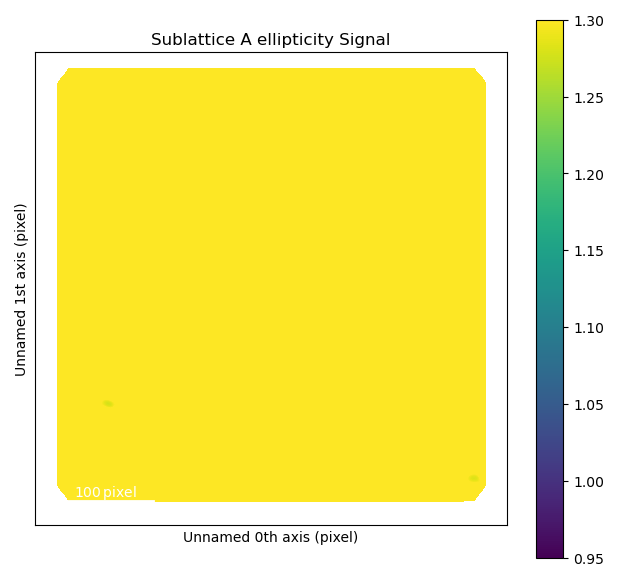

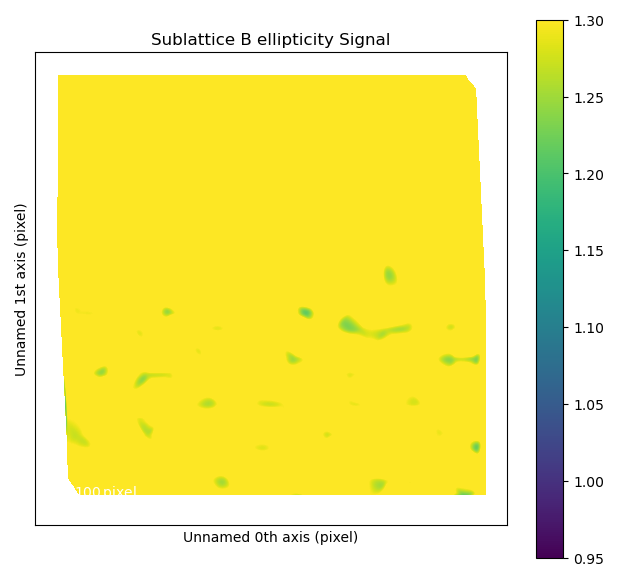

In [26]:
sublattice_A = atom_lattice.sublattice_list[0]
sublattice_B = atom_lattice.sublattice_list[1]
sublattice_A.plot_ellipticity_map(cmap='viridis', vmin=0.95, vmax=1.3)
sublattice_B.plot_ellipticity_map(cmap='viridis', vmin=0.95, vmax=1.3)

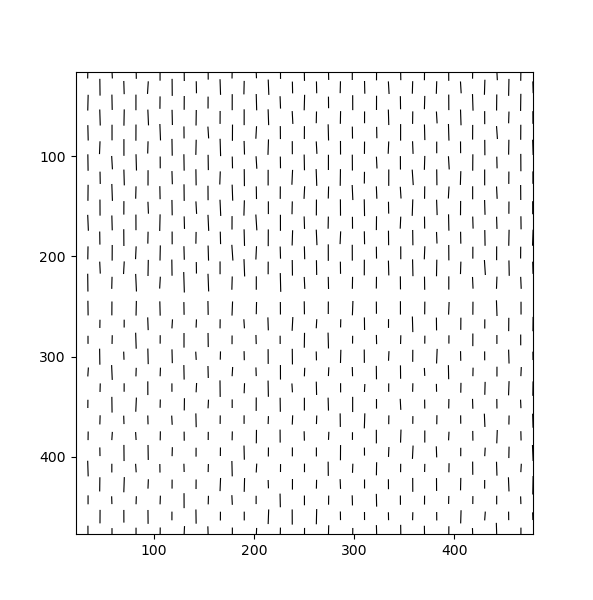

In [27]:
sublattice_A.plot_ellipticity_vectors()

In [31]:
s_monolayer = sublattice_B.get_monolayer_distance_map()
s_monolayer.plot(cmap='viridis')

C:\Users\user\HyperSpy-bundle\Lib\site-packages\hyperspy\drawing\utils.py:168: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**kwargs)


In [32]:
s_peaks = am.get_feature_separation(s, separation_range=(2, 20), show_progressbar=False)

In [33]:
s_peaks.plot()

In [34]:
atom_positions = am.get_atom_positions(s, separation=3)

In [35]:
atom_lattice = am.get_atom_positions(s, separation=3)

In [36]:
s_peaks = am.get_feature_separation(s, separation_range=(2, 20), show_progressbar=False)

In [37]:
s_peaks.plot()


In [38]:
atom_positions = am.get_atom_positions(s, separation=8)

In [39]:
sublattice = am.Sublattice(atom_positions, image=s.data)
sublattice

<Sublattice,  (atoms:656,planes:0)>

In [40]:
sublattice.find_nearest_neighbors()
sublattice.refine_atom_positions_using_center_of_mass()
sublattice.refine_atom_positions_using_2d_gaussian()

Center of mass:   0%|          | 0/656 [00:00<?, ?it/s]

Gaussian fitting:   0%|          | 0/656 [00:00<?, ?it/s]

In [41]:
sublattice.get_position_history().plot()

In [42]:
atom_list = sublattice.atom_list
atom_list[0] 

<Atom_Position,  (x:142.1,y:491.1,sx:2.8,sy:3.9,r:0.0,e:1.4)>

In [43]:
sublattice.construct_zone_axes()
sublattice
sublattice.plot_planes()

In [44]:
atom_lattice = am.Atom_Lattice(image=s.data, name='fantasite')
atom_lattice.save("dumbell2.hdf5", overwrite=True)

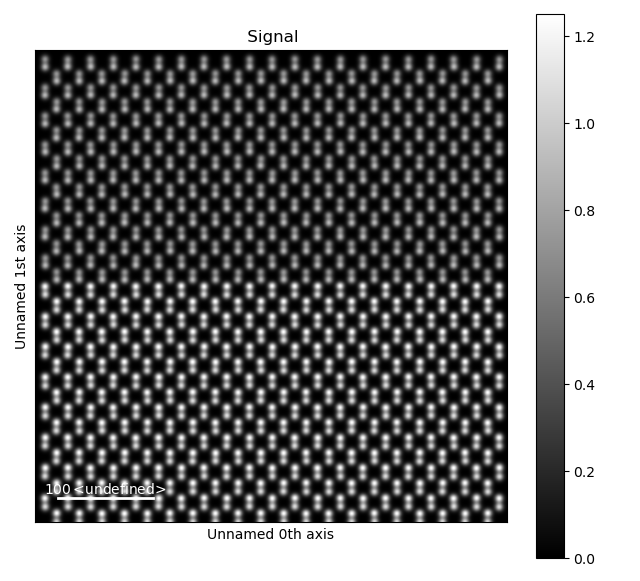

IndexError: list index out of range

In [45]:
s.plot()
atom_lattice.plot()

In [46]:
import atomap.api as am
atom_lattice = am.load_atom_lattice_from_hdf5("dumbell2.hdf5")
atom_lattice

<Atom_Lattice, fantasite (sublattice(s): 0)>

In [47]:
atom_lattice.sublattice_list

[]

In [48]:
image = atom_lattice.image

In [49]:
x = sublattice.x_position
y = sublattice.y_position
sigma_x = sublattice.sigma_x
sigmal_y = sublattice.sigma_y
ellipticity = sublattice.ellipticity
rotation = sublattice.rotation_ellipticity

In [50]:
atom_position_list = sublattice.atom_list
atom_position = atom_position_list[0]
x = atom_position.pixel_x
y = atom_position.pixel_y
sigma_x = atom_position.sigma_x
sigma_y = atom_position.sigma_y

In [51]:
atom_plane_list = sublattice.atom_plane_list
atom_plane = atom_plane_list[0]
atoms_in_plane_list = atom_plane.atom_list

In [52]:
zone_axis0 = sublattice.zones_axis_average_distances[0]
atom_plane_list0 = sublattice.atom_planes_by_zone_vector[zone_axis0]

In [53]:
sublattice = atom_lattice.sublattice_list[0]

sublattice.plot_ellipticity_map(cmap='viridis', vmin=0.95, vmax=1.3)


IndexError: list index out of range

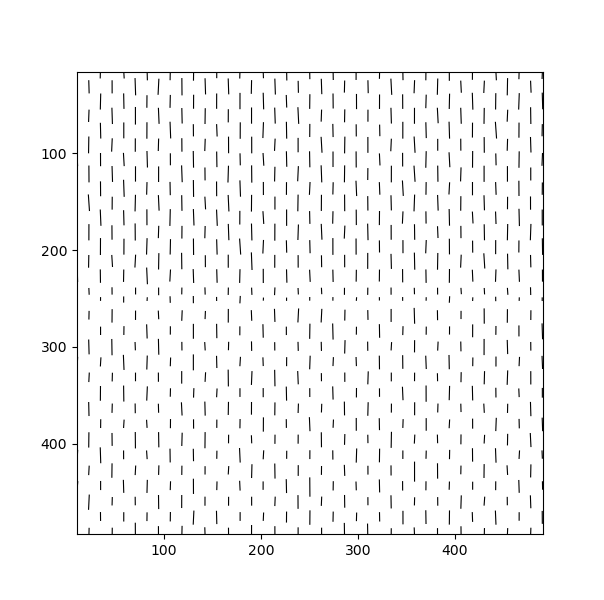

In [54]:
sublattice.plot_ellipticity_vectors()